<a href="https://colab.research.google.com/github/sukhyun1017/pytorch-study/blob/main/pytorch_%EC%9B%8C%EB%93%9C%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

워드 임베딩이란 단어를 밀집 표현으로 변환하는 것

In [8]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 3.9 MB/s 
     |████████████████████████████████| 448 kB 27.3 MB/s 


In [9]:
from konlpy.tag import Okt
okt=Okt()
token = okt.morphs('나는 자연어 처리를 배운다') #morphs 형태소 추출
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [6]:
word2index = {}
for voca in token:
  word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [7]:
def one_hot_encoding(word,word2index):
  one_hot_vector = [0]*(len(word2index))
  index = word2index[word]
  one_hot_vector[index]=1
  return one_hot_vector

In [8]:
one_hot_encoding("자연어",word2index)
#원핫 인코딩은 단어 간 유사도를 계산할 수 없음

[0, 0, 1, 0, 0, 0]

word2vec 실습

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm.notebook import tqdm

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f9a8aa93950>)

In [12]:
train_data = pd.read_table('ratings.txt')

In [13]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [14]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [15]:
print(train_data.isnull().values.any())

True


In [16]:
train_data =train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [17]:
print(len(train_data))

199992


In [18]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [19]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [22]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

  0%|          | 0/199992 [00:00<?, ?it/s]

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


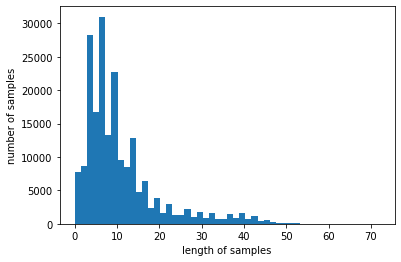

In [23]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, #학습시킬 문장
                 size = 100,                 #임베딩된 벡터의 차원 or feature value
                 window = 5,                 # 주변 단어수
                 min_count = 5,              # 단어 최소 빈돗
                 workers = 4,                #학습에 사용ㅇ되는 프로세스 수?
                 sg = 0)                     # 0:CBOW / 1:Skip-gram

In [25]:
model.wv.vectors.shape

(16477, 100)

In [26]:
print(model.wv.most_similar("최민식"))

[('송강호', 0.8457307815551758), ('안성기', 0.8439514636993408), ('정재영', 0.843315601348877), ('한석규', 0.8408789038658142), ('조재현', 0.8371881246566772), ('이민호', 0.8346199989318848), ('서영희', 0.8290045261383057), ('공효진', 0.8250928521156311), ('김창완', 0.8231102228164673), ('박중훈', 0.821129560470581)]
